# SHAP Tutorial 
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone

In [167]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
import shap

from sklearn.metrics import accuracy_score,confusion_matrix

## Dataset

In [154]:
data = pd.read_csv("../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

y = data['rings']
X = data.drop('rings', axis=1)

print(len(data))
data.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Transformation

In [155]:
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)
X

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,0,1
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,0,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0,1,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,0,1,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,1,0,0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,0,1,0


In [ ]:
## Train Model

Text(0.5, 0, 'Actual')

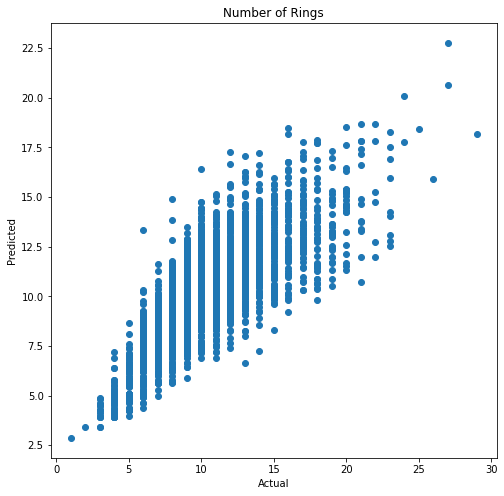

In [110]:
model = xgb.XGBRegressor(objective="reg:squarederror") #XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X, y)

y_pred = model.predict(X)



fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.title("Number of Rings")
plt.ylabel('Predicted')
plt.xlabel('Actual')

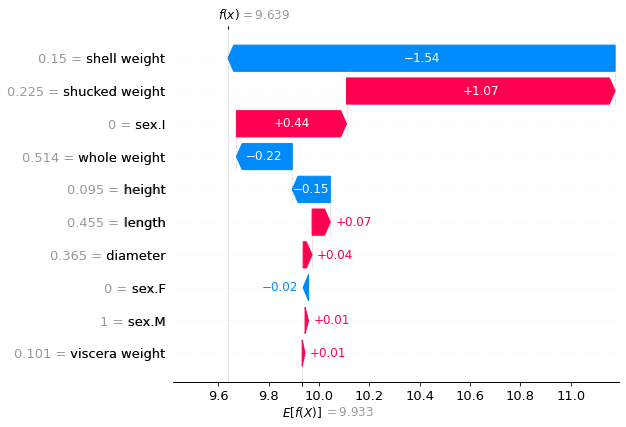

In [105]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [124]:
shap.plots.force(shap_values[0])
#shap.initjs()

In [127]:
shap.plots.force(shap_values[0:100])

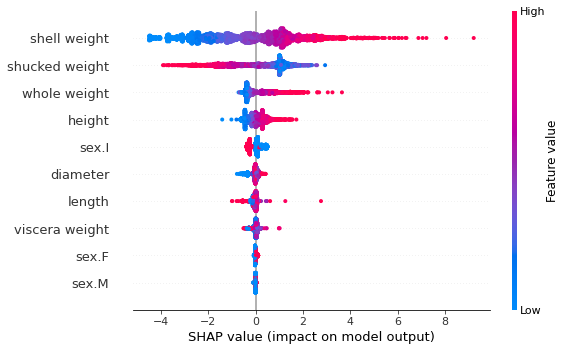

In [129]:
shap.plots.beeswarm(shap_values)

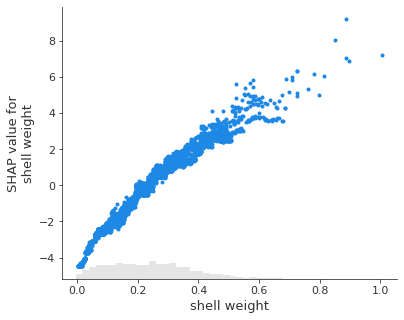

In [130]:
shap.plots.scatter(shap_values[:,"shell weight"])

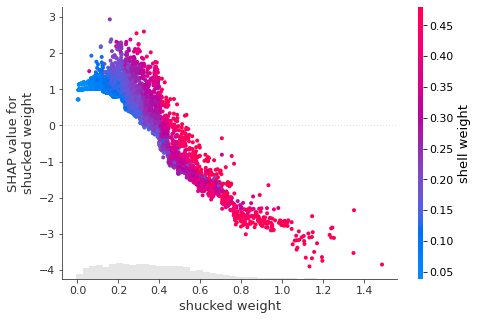

In [133]:
shap.plots.scatter(shap_values[:,"shucked weight"], color=shap_values[:,"shell weight"])

Text(0, 0.5, 'shell weight')

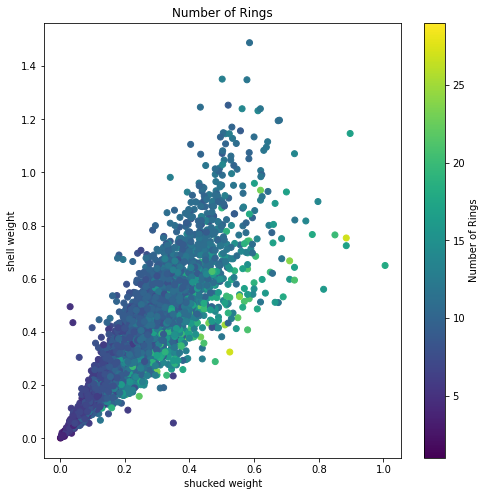

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(data["shell weight"],data["shucked weight"],c=data["rings"])
plt.colorbar(label="Number of Rings", orientation="vertical")
plt.title("Number of Rings")
plt.xlabel('shucked weight')
plt.ylabel('shell weight')

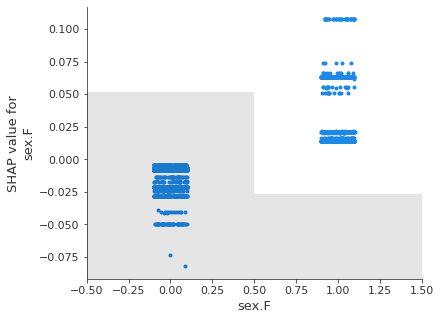

In [123]:
shap.plots.scatter(shap_values[:,"sex.F"])

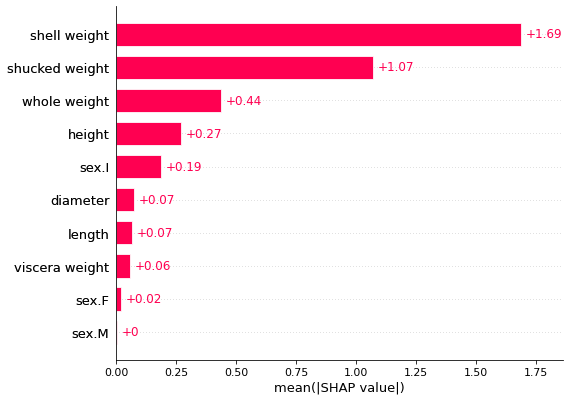

In [114]:
shap.plots.bar(shap_values)

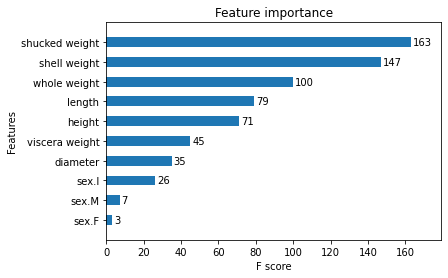

In [143]:
from xgboost import plot_importance

from matplotlib import pyplot

plot_importance(model,grid=False,height=0.5)
pyplot.show()


In [156]:
np.mean(y)
y = [1 if y_>10 else 0 for y_ in y]
y

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [162]:
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

[[2446  284]
 [ 500  947]]


0.812305482403639

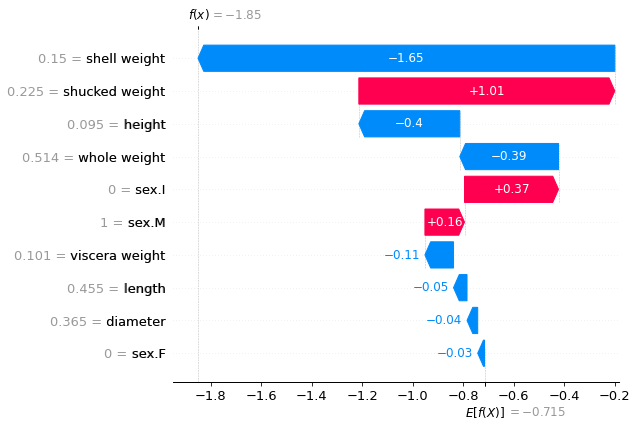

In [158]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

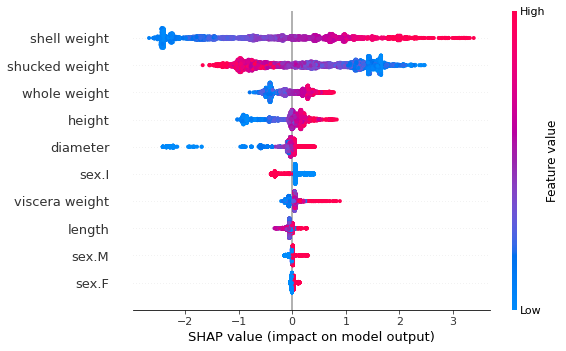

In [159]:
shap.plots.beeswarm(shap_values)